In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as imputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def load(vectorized_train,labels):
    X = pd.read_pickle(vectorized_train)
    X[pd.isnull(X)] = 0.
    X = X.astype(pd.SparseDtype('float', 0.))
    X['sum_all'] = X['sum_1'] + X['sum_0'] + X['sum_none']
    X['sum_ratio'] = X['sum_1'] / (X['sum_0'] + X['sum_none'] + 1)
    X['sum_diff'] = X['sum_1']-X['sum_0']
    names = list(X.columns)


    imputer_ = imputer(missing_values=-1,strategy='mean',add_indicator=False)
    X = imputer_.fit_transform(X)

    y = pd.read_pickle(labels)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X,names,y

In [23]:
def biplot(score, coeff, maxdim, pcax, pcay, txtlabels=None,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n = min(coeff.shape[0], maxdim)
    scalex = 2.0/(xs.max()- xs.min())
    scaley = 2.0/(ys.max()- ys.min())
    text_scale_factor = 1.5
    if labels is None:
        plt.scatter(xs*scalex, ys*scaley, s=1)
    else:
        plt.scatter(xs*scalex, ys*scaley, s=1,c=labels,alpha=0.02,cmap='PiYG')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if txtlabels is None:
            plt.text(coeff[i,pca1]* text_scale_factor, coeff[i,pca2] * text_scale_factor, "Var"+str(i+1), color='black', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* text_scale_factor, coeff[i,pca2], txtlabels[i], color='black', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

#plt.figure()

# Uncomment this code to generate the biplot using your previous answers
# X_beer_normalized = answer_pca_a()
# pca = answer_pca_c()
# X_beer_pca = pca.transform(X_beer_normalized)
# biplot(X_beer_pca, np.transpose(pca.components_[0:2, :]), 5, 1, 2, labels=feature_names[1:])

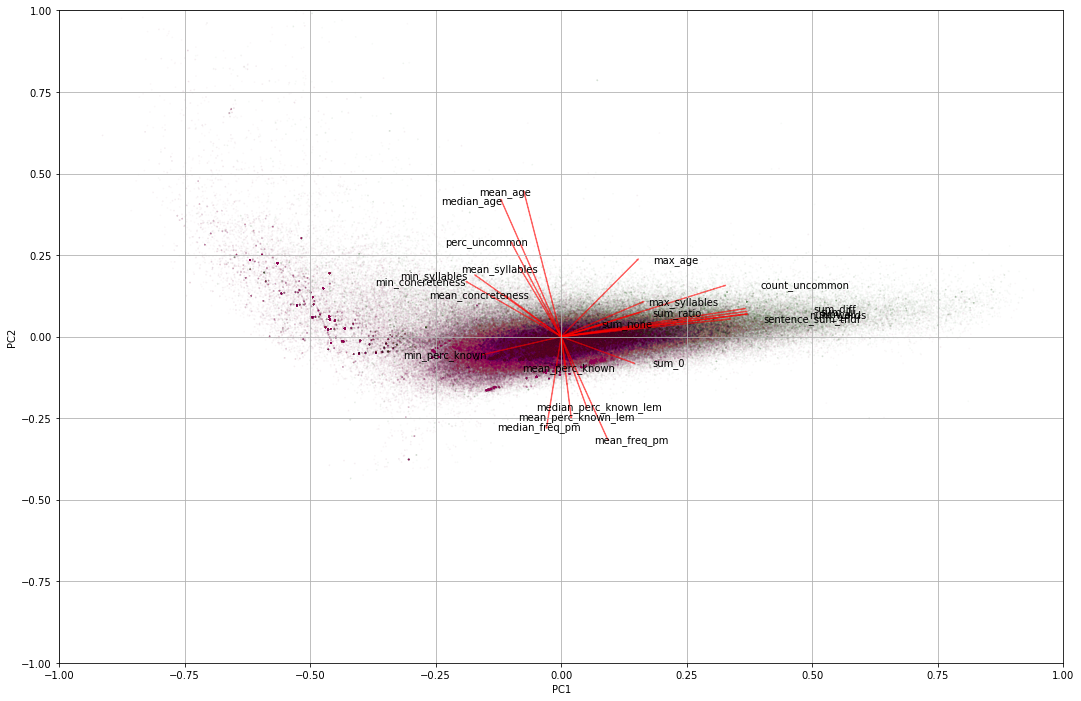

In [24]:
plt.figure(figsize=(18,12))

# Uncomment this code to generate the biplot using your previous answers
# X_beer_normalized = answer_pca_a()
# pca = answer_pca_c()
# X_beer_pca = pca.transform(X_beer_normalized)
# biplot(X_beer_pca, np.transpose(pca.components_[0:2, :]), 5, 1, 2, labels=feature_names[1:])
p = r"F:\Documents\_MADS\Semester 3 - Summer 2021\SIADS 694\SIADS694_PredictingTextDifficulty\data\model\vectorized_train_F.pkl"
l = r"F:\Documents\_MADS\Semester 3 - Summer 2021\SIADS 694\SIADS694_PredictingTextDifficulty\data\model\labels.pkl"
X,names,labels = load(p,l)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
biplot(X_pca,np.transpose(pca.components_[0:2,:]),30,1,2,txtlabels=names,labels=labels)